# DBSCAN Clustering 

In [1]:
#import packages 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

For this example we will use the the make_moons dataset from sklearn

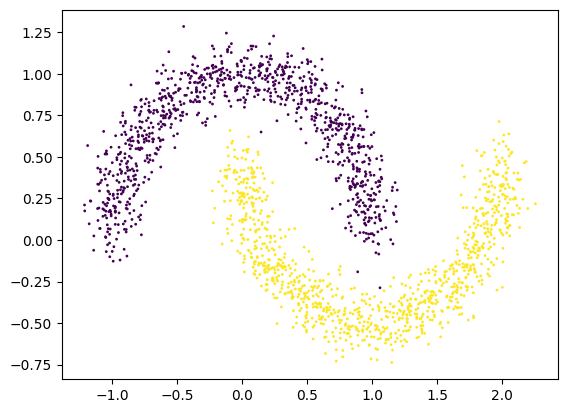

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=2000,noise=0.10,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y,s=1)

In [ ]:
%%time 
dbscan = DBSCAN(eps=0.05,min_samples=5)#note the eps value 
dbscan.fit(X)

CPU times: user 16.5 ms, sys: 655 µs, total: 17.2 ms
Wall time: 27.7 ms


DBSCAN(eps=0.05)

In [ ]:
#Get  50 labels 
dbscan.labels_[:50]

array([ 1,  0,  1,  2,  1,  1,  2,  1,  0,  1,  0,  1,  1,  0,  0,  0,  2,
        0,  1, -1,  2,  1,  1,  1,  1, -1,  1,  2,  2, -1,  0,  2,  0,  2,
        1,  0,  1,  1,  1,  0,  0,  1, -1,  0,  1,  2,  0, -1,  0,  1])

Let's plot and compare these lables with our actual labels 

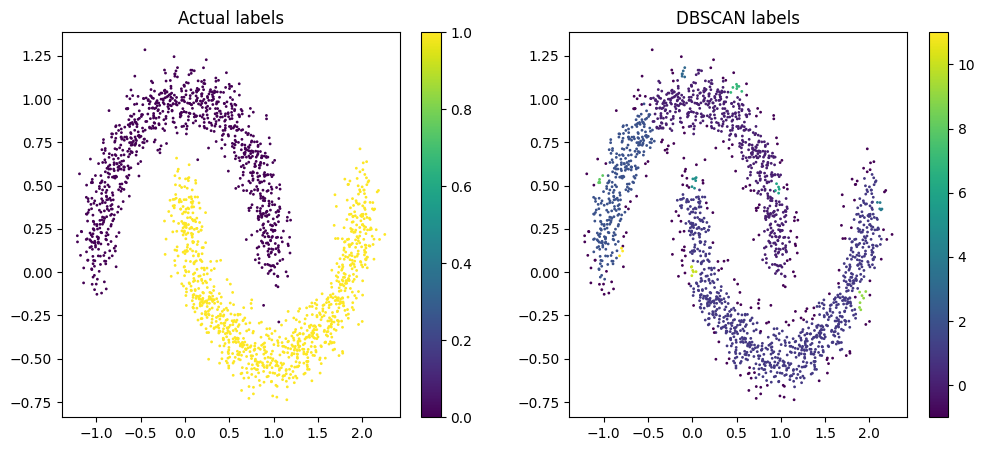

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=y,s=1)
plt.title("Actual labels")
plt.colorbar()

plt.subplot(1, 2,2)
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_,s=1)
plt.title("DBSCAN labels")
plt.colorbar()

plt.show()

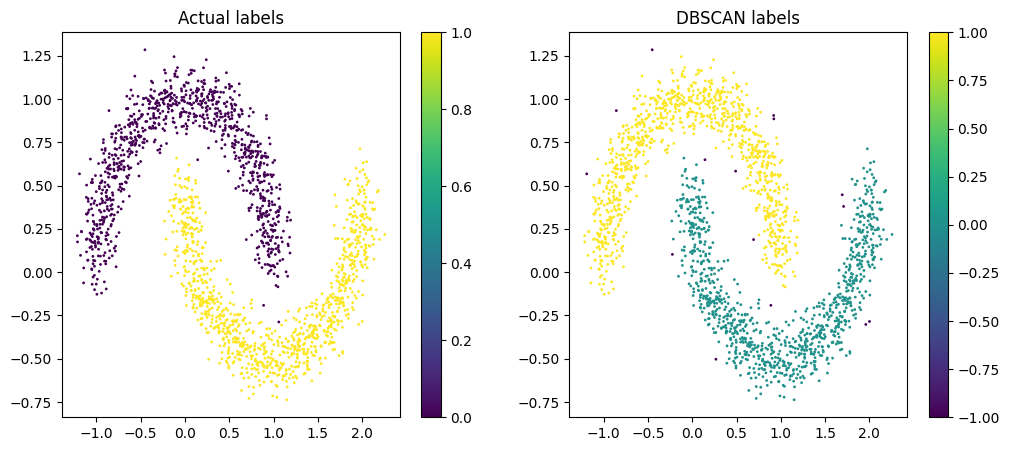

In [ ]:
dbscan = DBSCAN(eps=0.10,min_samples=5)
dbscan.fit(X)
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],c=y,s=1)
plt.title("Actual labels")
plt.colorbar()

plt.subplot(122)
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_,s=1)
plt.title("DBSCAN labels")
plt.colorbar()

plt.show()

Now let's compare to K-Means 

In [7]:
from sklearn.cluster import KMeans
moon_k = KMeans(n_clusters=2)
moon_k.fit(X)
y_pred = moon_k.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred, s=3)

NameError: ignored

Yikes, that is not good at all, you can tell the shape of the cluster is making things difficult 

# Using DBSCAN with other techniques 

We can easily combine DBSCAN clusters with other ML models 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier()

In [ ]:
#Create new instance 
X_new = np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [ ]:
#Now check the probabilties 
knn.predict_proba(X_new)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

# Image Segmentation with Unsupervised Learning 

First we need a picture to work with. 

In [2]:
from PIL import Image
import urllib.request
from PIL import Image
  
urllib.request.urlretrieve(
  'https://github.com/LGKerby/Python/raw/master/ladybug.png',
   "ladybug.png")

image = Image.open("ladybug.png")
#image.show()
from matplotlib.image import imread
import matplotlib.pyplot as plt
image = imread("ladybug.png")
image.shape # 533 pixel height x 800 pixel width x 3 color channels (RGB)

(533, 800, 3)

Each entry is a pixel (a list) with three values for color (RGB). These are scaled to be between 0 and 1, but more often you will see between 0 and 255 (256 colors)

In [3]:
image #each entry pixel with three values for color (RGB)

array([[[0.09803922, 0.11372549, 0.00784314],
        [0.09411765, 0.10980392, 0.00392157],
        [0.09411765, 0.11372549, 0.        ],
        ...,
        [0.22352941, 0.4117647 , 0.08235294],
        [0.21960784, 0.40392157, 0.08627451],
        [0.20392157, 0.3882353 , 0.07450981]],

       [[0.09411765, 0.10980392, 0.00392157],
        [0.09019608, 0.10588235, 0.        ],
        [0.09019608, 0.10588235, 0.        ],
        ...,
        [0.23529412, 0.42352942, 0.08627451],
        [0.23137255, 0.41568628, 0.09803922],
        [0.21568628, 0.4       , 0.08627451]],

       [[0.09019608, 0.10588235, 0.00784314],
        [0.08627451, 0.10196079, 0.00392157],
        [0.08627451, 0.10196079, 0.        ],
        ...,
        [0.25882354, 0.44705883, 0.10980392],
        [0.24705882, 0.43529412, 0.10588235],
        [0.22745098, 0.4117647 , 0.09411765]],

       ...,

       [[0.05490196, 0.07058824, 0.00392157],
        [0.05490196, 0.07058824, 0.00392157],
        [0.05098039, 0

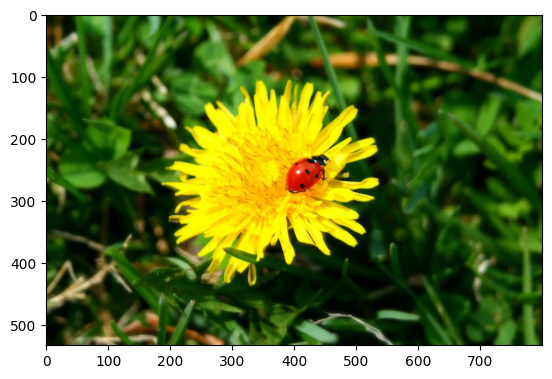

In [4]:
#Now lets see the image 
plt.imshow(image)

In [5]:
#Now in order to use this we need to reshape the data
print(image.shape)
X_img = image.reshape(-1,3)
X_img.shape # 426400 data points (ie pixels) in RGB 3D space

(533, 800, 3)


(426400, 3)

In [17]:
%%time
#fit a K-Means model
# use k-means to create 8 color clusters
kmeans_img = KMeans(n_clusters=6).fit(X_img) #make sure to change colors 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CPU times: user 6.4 s, sys: 81 ms, total: 6.48 s
Wall time: 4.63 s


In [18]:
kmeans_img.labels_

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

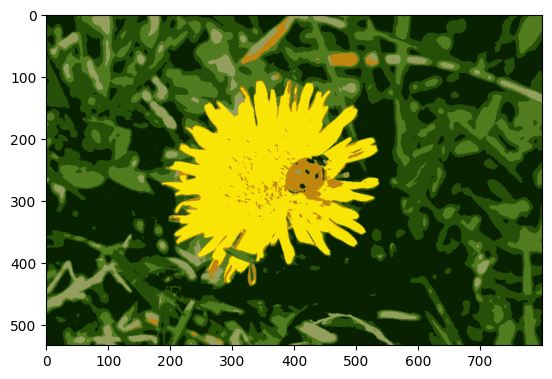

In [19]:
#Now we will plot the segmented image which will only display the number of colors we specify 
segmented_img= kmeans_img.cluster_centers_[kmeans_img.labels_]
segmented_img=segmented_img.reshape(image.shape)
segmented_img #image data 
plt.imshow(segmented_img)


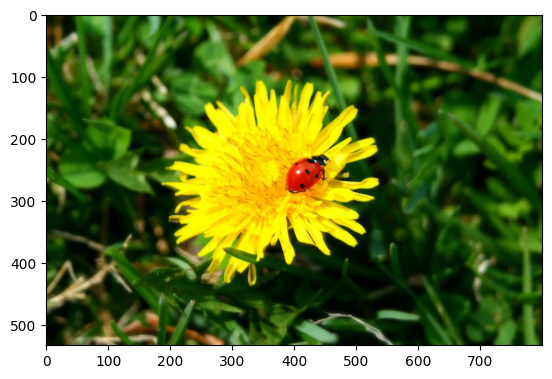

In [ ]:
plt.imshow(image)

# Dimensionality Reduction with PCA 

# MNIST Dataset

In [ ]:
# Download MNIST digits
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist['data'].shape

(70000, 784)

In [ ]:
mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
mnist['details']

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

Now we need to create and split our data 

In [ ]:
# Set X and y
X, y = mnist['data'], mnist['target']
#X = mnist['data']
#y = mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
# Split into training and testing 

# General splitting
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7)

#X_train.shape, X_test.shape
# If we trust their description that the first 60k are the training, and final 10k are the testing sets:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((60000,), (10000,))

In [ ]:
X = X.values
y = y.values
X[0]#Notice the data is scaled between 0 and 255

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

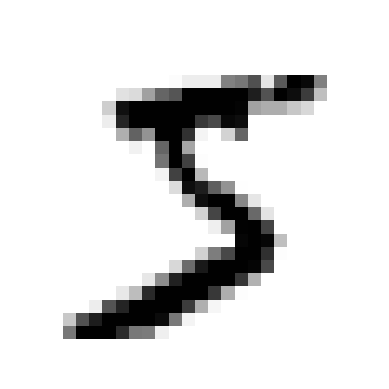

In [ ]:
#Let's plot an image 
# Plot an image
one_image = X[0].reshape(28,28)
one_image
plt.imshow(one_image)
plt.imshow(one_image, cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
y[0]

'5'

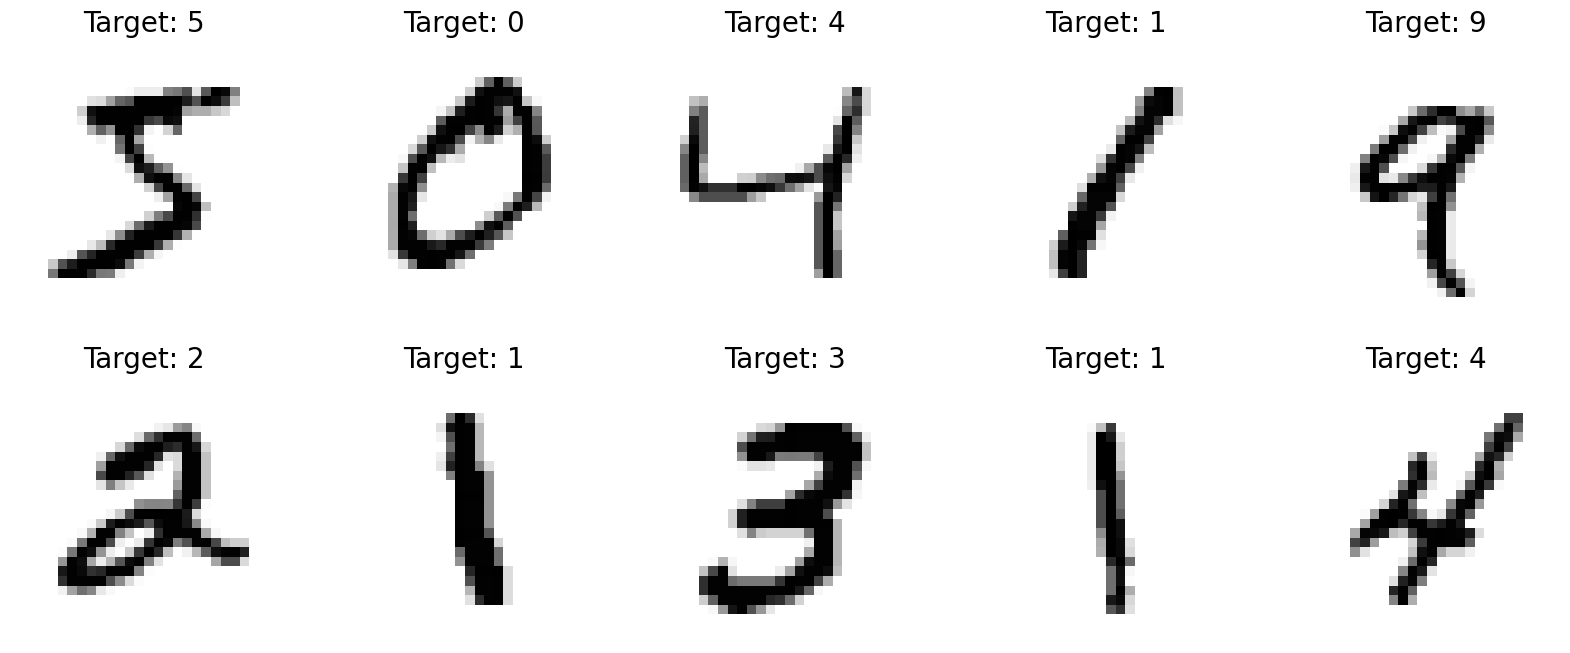

In [ ]:
plt.figure(figsize=(20,8))
for index in range(10):
  plt.subplot(2,5,index+1)
  plt.imshow(X[index+0].reshape(28,28), cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {y[index+0]}', fontsize=20)

plt.show()

In [ ]:
#Now let's train a logistic regress model so we can see the effect PCA can have 

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the model
logreg = LogisticRegression(solver='lbfgs',n_jobs=-1, max_iter=1000) 


In [ ]:
# Train the model, time how long it takes
import time
t0 = time.time()
logreg.fit(X_train, y_train)
t1 = time.time()
print(f'Time it took logistic regression to train on 60k images with 784 features: {t1-t0} seconds')

Time it took logistic regression to train on 60k images with 784 features: 295.13064336776733 seconds


# Applying PCA 

In [ ]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
# not needed in Colab

# Download MNIST digits
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Set X and y
X, y = mnist['data'].values, mnist['target'].values
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
# Standardize the feature set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only
scaler.fit(X_train)
# Apply the transform to both the training and testing set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Now use PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) # 0-1: by variance; int >= 1 n_components
pca.fit(X_train_scaled)

pca.n_components_

331

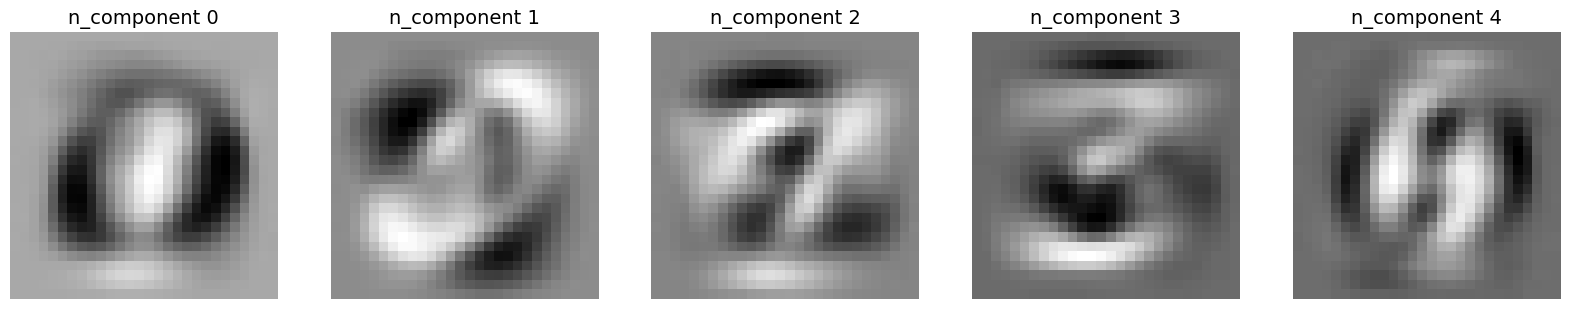

In [ ]:
#Now let's see what the images look like now 
plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(pca.components_[index].reshape(28,28), cmap='binary')
  plt.axis('off')
  plt.title(f'n_component {index}', fontsize=14)

plt.show()

In [ ]:
# Apply PCA model to training and testing sets
X_train_PCA = pca.transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)

X_train_PCA.shape

(60000, 331)

In [ ]:
#Now let's see how long it takes for the logistic regression model to train 
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Create an instance of the model
logregPCA = LogisticRegression(solver='lbfgs',n_jobs=-1, max_iter=1000)

In [ ]:
import time
t0 = time.time()
logreg.fit(X_train, y_train)
t1 = time.time()
print(f'Time it took logistic regression to train on 60k images without PCA: {t1-t0} seconds')

Time it took logistic regression to train on 60k images without PCA: 298.84664821624756 seconds


In [ ]:
# Check accuracy
print(f'Training score: {logreg.score(X_train,y_train)}      Testing score: {logreg.score(X_test,y_test)}')

Training score: 0.9416166666666667      Testing score: 0.9206


In [ ]:
import time
t0 = time.time()
logregPCA.fit(X_train_PCA, y_train)
t1 = time.time()
print(f'Time it took logistic regression to train on 60k images with PCA, 331 features: {t1-t0} seconds')

Time it took logistic regression to train on 60k images with PCA, 331 features: 116.98101902008057 seconds


In [ ]:
# Check accuracy
print(f'Training score: {logregPCA.score(X_train_PCA,y_train)}      Testing score: {logregPCA.score(X_test_PCA,y_test)}')

Training score: 0.9355166666666667      Testing score: 0.9264
